In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, ".."))

  Activating project at `~/Research/Bump10MSun`


In [2]:
using ArviZ
using Bump10MSun
using DimensionalData
using Distributions
using HDF5
using LaTeXStrings
using Printf
using MCMCChains
using MCMCChainsStorage
using MCMCDiagnosticTools
using StatsBase
using StatsPlots
using Trapz
using Turing

TODO: describe the different mass functions, pairing functions, etc!

In [3]:
suffix_map = Dict(
    (BrokenPowerLaw(), GaussianPairing()) => "",
    (BrokenPowerLaw(), PowerLawPairing()) => "_plp",
    (TwoBrokenPowerLaw(), GaussianPairing()) => "_tb",
    (TwoBrokenPowerLaw(), PowerLawPairing()) => "_tb_plp",
    (PowerLawGaussian(), PowerLawPairing()) => "_plg"
)

mf_var_name_map = Dict(
    BrokenPowerLaw() => [:R, :a1, :a2, :mb],
    TwoBrokenPowerLaw() => [:R, :a1, :a2, :a3, :mb12, :mb23],
    PowerLawGaussian() => [:R, :a1, :a2, :mu, :sigma, :fg]
)
pf_var_name_map = Dict(
    GaussianPairing() => [:mu_q, :sigma_q],
    PowerLawPairing() => [:beta]
)

var_name_map = Dict((km, kp) => vcat(mv, pv) for (km, mv) in pairs(mf_var_name_map) for (kp, pv) in pairs(pf_var_name_map))

mf_label_map = Dict(
    BrokenPowerLaw() => "Broken PL",
    TwoBrokenPowerLaw() => "Two Broken PL",
    PowerLawGaussian() => "Power Law + Gaussian"
)
pf_label_map = Dict(
    GaussianPairing() => "Gaussian Pair",
    PowerLawPairing() => "Power Law Pair"
)

Dict{PairingFunction, String} with 2 entries:
  GaussianPairing() => "Gaussian Pair"
  PowerLawPairing() => "Power Law Pair"

In [4]:
traces = Dict(k => from_netcdf(joinpath(@__DIR__, "..", "chains", "chain" * suffix_map[k] * ".nc")) for k in keys(suffix_map))

Dict{Tuple{MassFunction, PairingFunction}, InferenceData{(:posterior, :sample_stats)}} with 5 entries:
  (BrokenPowerLaw(), Power… => InferenceData{(:posterior, :sample_stats), Tuple…
  (TwoBrokenPowerLaw(), Po… => InferenceData{(:posterior, :sample_stats), Tuple…
  (PowerLawGaussian(), Pow… => InferenceData{(:posterior, :sample_stats), Tuple…
  (BrokenPowerLaw(), Gauss… => InferenceData{(:posterior, :sample_stats), Tuple…
  (TwoBrokenPowerLaw(), Ga… => InferenceData{(:posterior, :sample_stats), Tuple…

(BrokenPowerLaw(), PowerLawPairing())
(TwoBrokenPowerLaw(), PowerLawPairing())
(PowerLawGaussian(), PowerLawPairing())
(BrokenPowerLaw(), GaussianPairing())
(TwoBrokenPowerLaw(), GaussianPairing())


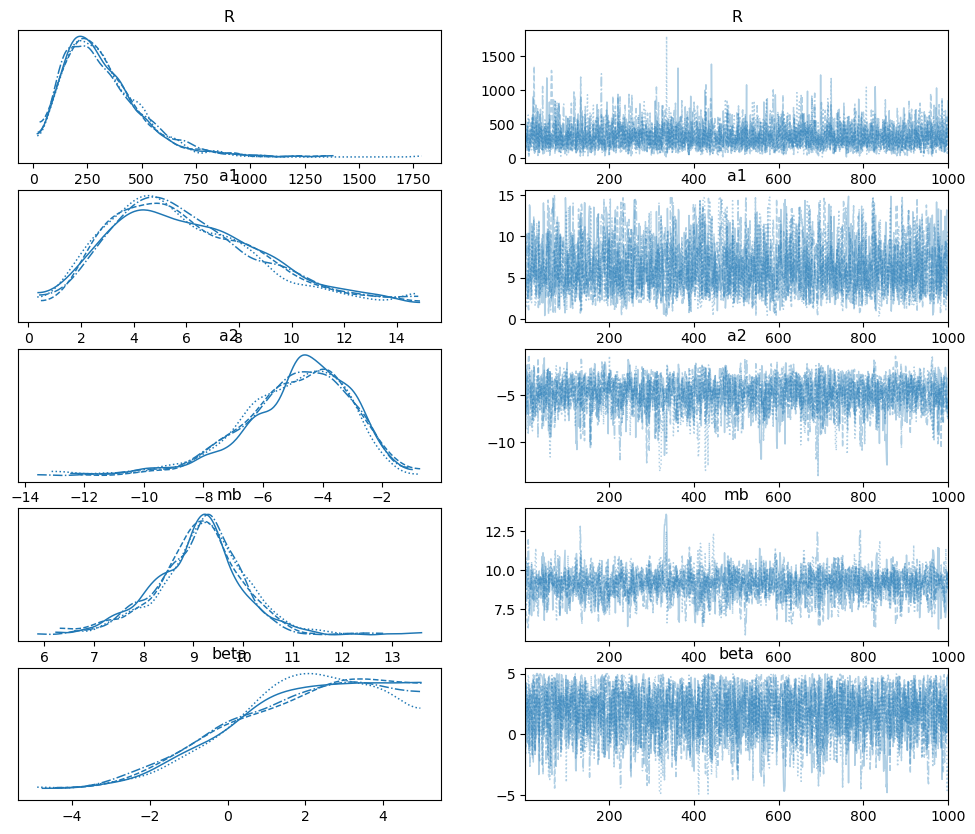

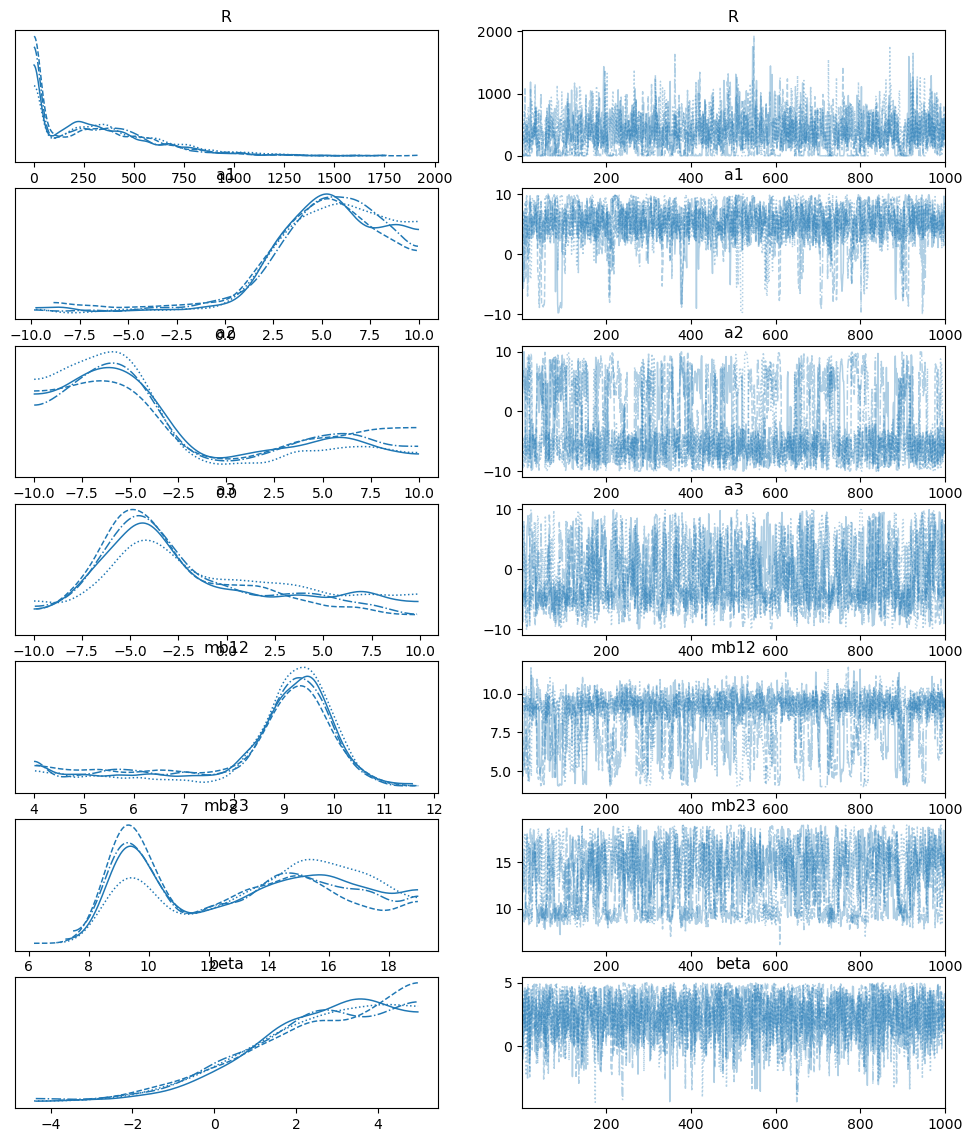

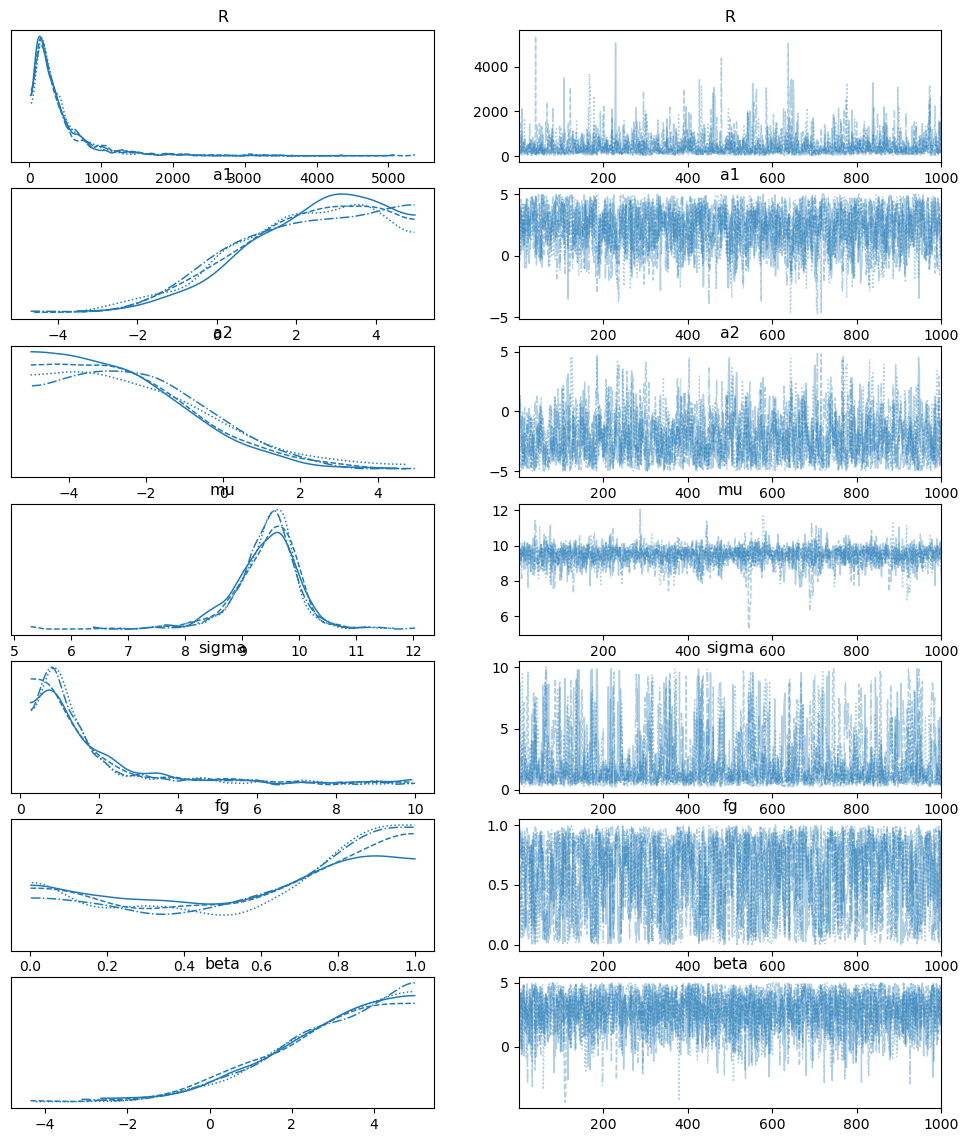

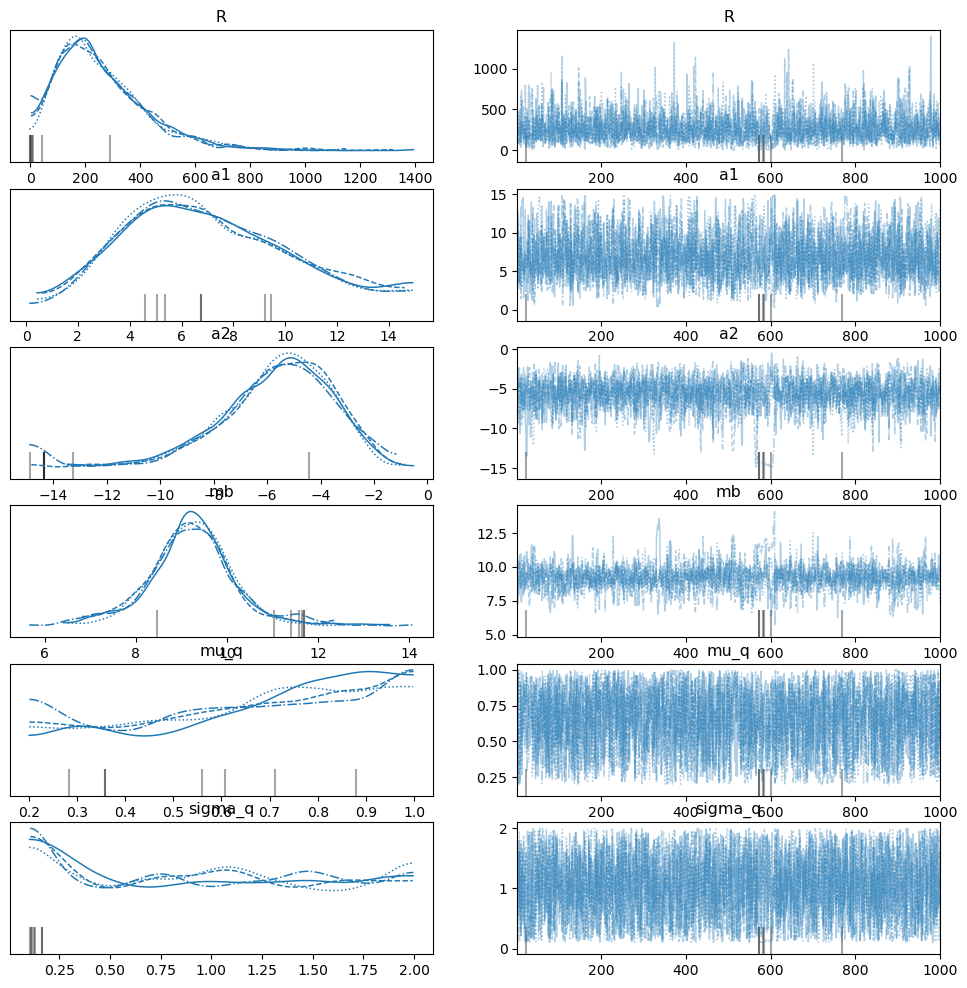

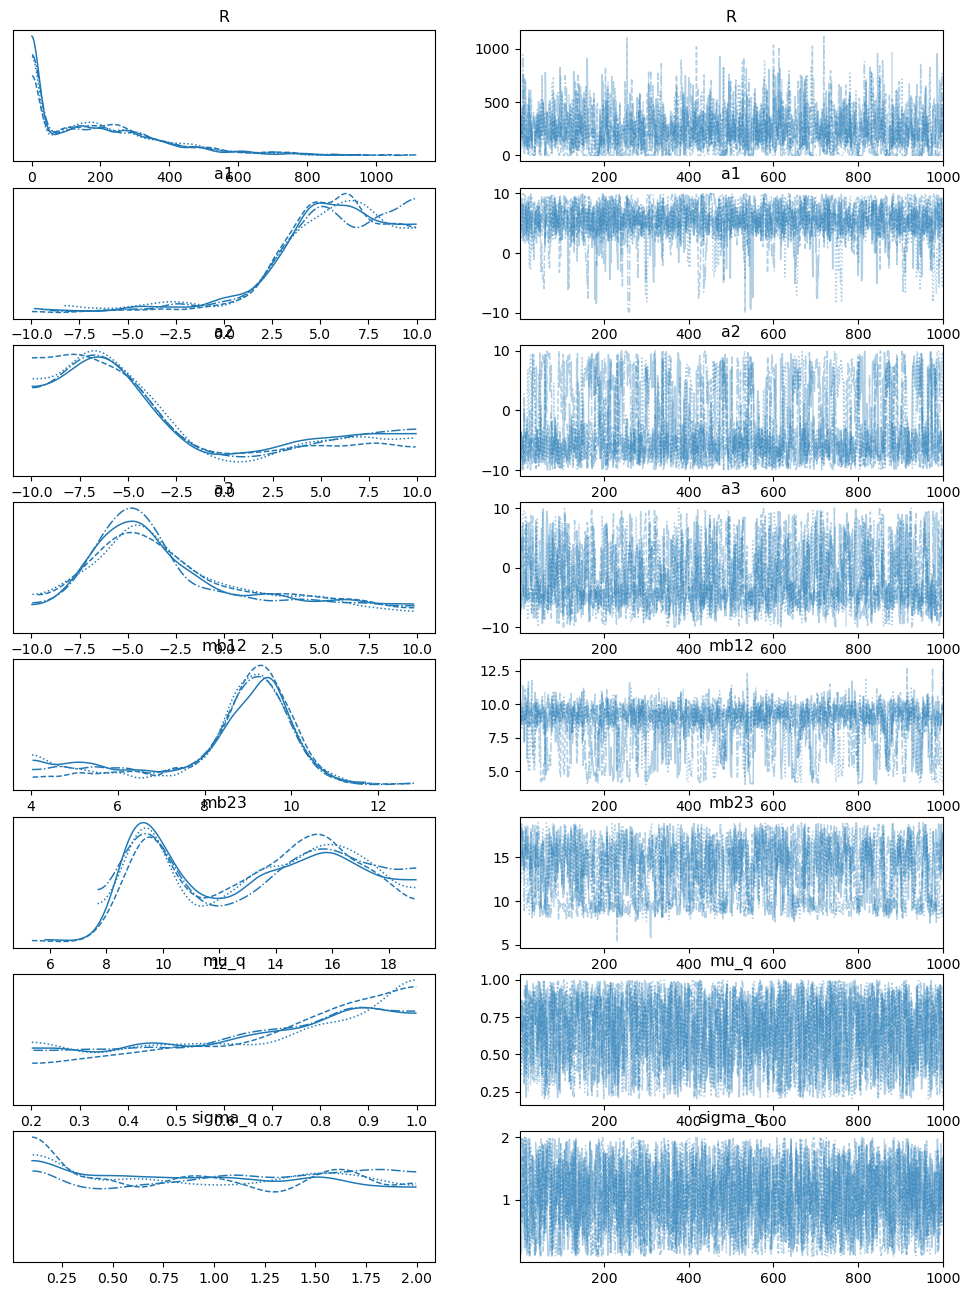

In [5]:
for (k, t) in pairs(traces)
    println(k)
    plot_trace(t, var_names=var_name_map[k])
end

In [6]:
for (k, t) in pairs(traces)
    println(k)
    display(summarystats(t, var_names=var_name_map[k]))
end

(BrokenPowerLaw(), PowerLawPairing())


5×10 DataFrame
 Row │ variable  mean     sd       hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_b ⋯
     │ String    Float64  Float64  Float64  Float64  Float64    Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ R         317.857  181.426   37.743  638.566      3.078    2.224    345 ⋯
   2 │ a1          6.305    3.163    1.218   12.768      0.073    0.056    199
   3 │ a2         -4.896    1.826   -8.222   -1.797      0.049    0.037    146
   4 │ mb          9.12     0.885    7.34    10.709      0.025    0.017    138
   5 │ beta        1.869    2.033   -1.634    4.995      0.044    0.033    194 ⋯
                                                               3 columns omitted

(TwoBrokenPowerLaw(), PowerLawPairing())


7×10 DataFrame
 Row │ variable  mean     sd       hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_b ⋯
     │ String    Float64  Float64  Float64  Float64  Float64    Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ R         339.013  284.408    0.0    824.13      11.496    8.133     46 ⋯
   2 │ a1          5.119    3.332    0.025    9.995      0.121    0.086    101
   3 │ a2         -3.025    5.719   -9.998    7.878      0.324    0.229     42
   4 │ a3         -1.499    4.886   -9.401    7.845      0.199    0.141     69
   5 │ mb12        8.548    1.644    4.481   10.506      0.091    0.064     43 ⋯
   6 │ mb23       13.309    3.225    8.456   18.472      0.192    0.136     33
   7 │ beta        2.46     1.766   -0.585    4.998      0.035    0.031    219
                                                               3 columns omitted

(PowerLawGaussian(), PowerLawPairing())


7×10 DataFrame
 Row │ variable  mean     sd       hdi_3%   hdi_97%   mcse_mean  mcse_sd  ess_ ⋯
     │ String    Float64  Float64  Float64  Float64   Float64    Float64  Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ R         418.448  455.166   13.912  1123.99      10.398    7.354    17 ⋯
   2 │ a1          2.25     1.768   -0.726     4.997      0.051    0.036    12
   3 │ a2         -2.216    1.923   -4.996     1.176      0.061    0.043     9
   4 │ mu          9.432    0.543    8.364    10.35       0.014    0.01     21
   5 │ sigma       2.112    2.19     0.251     7.111      0.07     0.05     12 ⋯
   6 │ fg          0.595    0.308    0.06      0.997      0.01     0.007     8
   7 │ beta        2.884    1.569    0.128     4.999      0.031    0.025    19
                                                               3 columns omitted

(BrokenPowerLaw(), GaussianPairing())


6×10 DataFrame
 Row │ variable  mean     sd       hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_b ⋯
     │ String    Float64  Float64  Float64  Float64  Float64    Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ R         259.0    167.591    0.001  554.745      3.168    2.241    124 ⋯
   2 │ a1          6.993    3.105    1.459   12.838      0.066    0.05     218
   3 │ a2         -5.643    2.176   -9.386   -1.919      0.094    0.088    109
   4 │ mb          9.224    0.93     7.273   10.999      0.029    0.022    119
   5 │ mu_q        0.649    0.232    0.258    0.999      0.005    0.004    214 ⋯
   6 │ sigma_q     1.008    0.571    0.1      1.893      0.012    0.008    179
                                                               3 columns omitted

(TwoBrokenPowerLaw(), GaussianPairing())


8×10 DataFrame
 Row │ variable  mean     sd       hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_b ⋯
     │ String    Float64  Float64  Float64  Float64  Float64    Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ R         214.916  186.438    0.0    540.561      6.136    4.34      64 ⋯
   2 │ a1          5.501    3.187    0.306    9.998      0.104    0.073    104
   3 │ a2         -3.163    5.755   -9.992    8.104      0.27     0.191     64
   4 │ a3         -1.998    4.869   -9.38     7.75       0.153    0.108    112
   5 │ mb12        8.523    1.646    4.579   10.637      0.078    0.055     63 ⋯
   6 │ mb23       13.401    3.252    8.454   18.561      0.147    0.104     54
   7 │ mu_q        0.662    0.232    0.266    1.0        0.005    0.003    219
   8 │ sigma_q     1.035    0.559    0.101    1.875      0.011    0.008    216
                                                               3 columns omitted

In [17]:
dNdm1dm2_map = Dict(k => map([traces[k].posterior[v] for v in var_name_map[k]]...) do args...
    ldN = make_log_dN(k[1], k[2], args[2:end]...)
    (m1, m2) -> args[1]*exp(ldN(m1, m2))         
end for k in keys(traces))
dNdm1_map = Dict(k => map([traces[k].posterior[v] for v in var_name_map[k]]...) do args...
    dN = make_dNdm1(k[1], k[2], args[2:end]...)
    m1 -> args[1]*dN(m1)
end for k in keys(traces))
dNdm2_map = Dict(k => map([traces[k].posterior[v] for v in var_name_map[k]]...) do args...
    dN = make_dNdm2(k[1], k[2], args[2:end]...)
    m2 -> args[1]*dN(m2)
end for k in keys(traces))
dNdq_map = Dict(k => map([traces[k].posterior[v] for v in var_name_map[k]]...) do args...
    dN = make_dNdq(k[1], k[2], args[2:end]...)
    q -> args[1]*dN(q)
end for k in keys(traces))
pm_map = Dict(k => map([traces[k].posterior[v] for v in mf_var_name_map[k[1]]]...) do args...
    make_dNdm(k[1], args[2:end]...)
end for k in keys(traces))

Dict{Tuple{MassFunction, PairingFunction}, DimArray{T, 2, Tuple{Dim{:draw, DimensionalData.Dimensions.LookupArrays.NoLookup{Base.OneTo{Int64}}}, Dim{:chain, DimensionalData.Dimensions.LookupArrays.NoLookup{Base.OneTo{Int64}}}}, Tuple{}, A, Symbol, DimensionalData.Dimensions.LookupArrays.NoMetadata} where {T, A<:AbstractMatrix{T}}} with 5 entries:
  (BrokenPowerLaw(), Power… => var"#18#19"{BrokenPowerLaw, Tuple{Float64, Float…
  (TwoBrokenPowerLaw(), Po… => var"#18#19"{TwoBrokenPowerLaw, NTuple{5, Float64…
  (PowerLawGaussian(), Pow… => var"#18#19"{PowerLawGaussian, NTuple{5, Float64}…
  (BrokenPowerLaw(), Gauss… => var"#18#19"{BrokenPowerLaw, Tuple{Float64, Float…
  (TwoBrokenPowerLaw(), Ga… => var"#18#19"{TwoBrokenPowerLaw, NTuple{5, Float64…

In [8]:
ms = exp.(log(mlow):0.01:log(mhigh))
ms = ms[2:end-1]

dN1_mean_map = Dict(
    k => begin
        dN_mean = zeros(length(ms))
        for dN in v
            dN_mean .= dN_mean .+ dN.(ms)
        end
        dN_mean .= dN_mean ./ length(v)
        dN_mean
    end
    for (k,v) in pairs(dNdm1_map)
)

dN2_mean_map = Dict(
    k => begin
        dN_mean = zeros(length(ms))
        for dN in v
            dN_mean .= dN_mean .+ dN.(ms)
        end
        dN_mean .= dN_mean ./ length(v)
        dN_mean
    end
    for (k,v) in pairs(dNdm2_map)
)

Dict{Tuple{MassFunction, PairingFunction}, Vector{Float64}} with 5 entries:
  (BrokenPowerLaw(), Power… => [0.164058, 0.166901, 0.169835, 0.172861, 0.17598…
  (TwoBrokenPowerLaw(), Po… => [0.88163, 0.779526, 0.693182, 0.620132, 0.558309…
  (PowerLawGaussian(), Pow… => [0.925334, 0.909994, 0.895682, 0.882344, 0.86993…
  (BrokenPowerLaw(), Gauss… => [0.174662, 0.177433, 0.180292, 0.18324, 0.186283…
  (TwoBrokenPowerLaw(), Ga… => [0.416564, 0.402779, 0.390566, 0.379771, 0.37026…

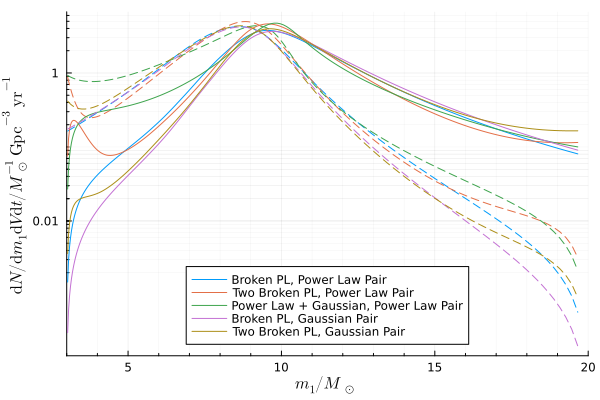

In [22]:
p = plot(xlabel=L"m_1 / M_\odot", ylabel=L"\mathrm{d} N / \mathrm{d} m_1 \mathrm{d} V \mathrm{d} t / M_\odot^{-1} \mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}", formatter=s->@sprintf("%.2g", s), minorgrid=true, xlims=(3, 20))
for (i, (k, v)) in enumerate(pairs(dN1_mean_map))
    p = plot!(ms, v, label=mf_label_map[k[1]] * ", " * pf_label_map[k[2]], yscale=:log10, color=i)
    p = plot!(ms, dN2_mean_map[k], label=nothing, color=i, linestyle=:dash)
end
p = plot!(legend_position=:bottom)
p

How about the "common" part of the mass function?

In [18]:
dNdm_mean_map = Dict(
    k => begin
        pm = zeros(length(ms))
        for v in pm_map[k]
            p = v.(ms)
            p = p ./ trapz(ms, p)
            pm = pm .+ p
        end
        pm = pm / length(pm_map[k])
        pm
    end
    for k in keys(traces)
)

Dict{Tuple{MassFunction, PairingFunction}, Vector{Float64}} with 5 entries:
  (BrokenPowerLaw(), Power… => [0.00950722, 0.00964144, 0.00977937, 0.00992112,…
  (TwoBrokenPowerLaw(), Po… => [0.0225714, 0.0216891, 0.0208887, 0.0201636, 0.0…
  (PowerLawGaussian(), Pow… => [0.0518699, 0.0514586, 0.0510653, 0.0506895, 0.0…
  (BrokenPowerLaw(), Gauss… => [0.00577907, 0.00587623, 0.00597636, 0.00607955,…
  (TwoBrokenPowerLaw(), Ga… => [0.01277, 0.0124834, 0.0122263, 0.0119968, 0.011…

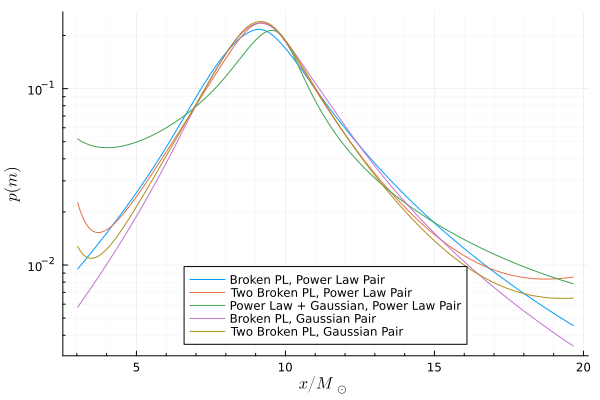

In [21]:
p = plot(xlabel=L"x/M_\odot", ylabel=L"p(m)", yscale=:log10, minorgrid=true, legend_position=:bottom)
for (k,v) in pairs(dNdm_mean_map)
    p = plot!(ms, v, label=mf_label_map[k[1]] * ", " * pf_label_map[k[2]])
end
p

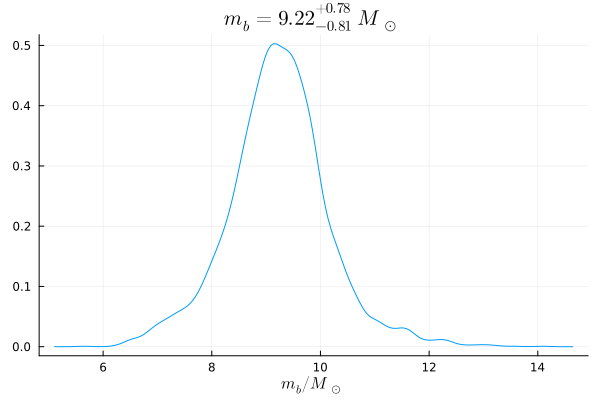

In [14]:
x = vec(trace.posterior.mb)
l = quantile(x, 0.16)
m = quantile(x, 0.5)
h = quantile(x, 0.84)

density(x, xlabel=L"m_b / M_\odot", label=nothing)
p = title!(@sprintf("\$m_b = %.2f^{+%.2f}_{-%.2f} \\, M_\\odot\$", m, h-m, m-l))

p

In [15]:
function m1pct(ms, f)
    fm = f.(ms)
    cfm = cumtrapz(ms, fm)

    ms[argmin(abs.(cfm/cfm[end] .- 0.01))]
end

m1pct (generic function with 1 method)

In [16]:
m1pct_m1 = map(dNdm1) do dN
    m1pct(ms, dN)
end
m1pct_m2 = map(dNdm2) do dN
    m1pct(ms, dN)
end
m1pct_pl = map(dNdm_pl) do dN
    m1pct(ms, dN)
end;

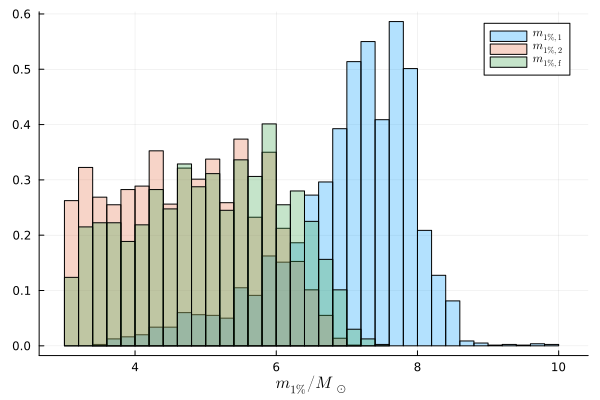

In [17]:
histogram(vec(m1pct_m1), label=L"m_{1\%,1}", xlabel=L"m_{1\%} / M_\odot", fillalpha=0.3, norm=:pdf)
histogram!(vec(m1pct_m2), label=L"m_{1\%,2}", fillalpha=0.3, norm=:pdf)
histogram!(vec(m1pct_pl), label=L"m_{1\%,\mathrm{f}}", fillalpha=0.3, norm=:pdf)

Let's do some model checking.  First, we plot the population-informed posteriors for $m_1$ and $m_2$:

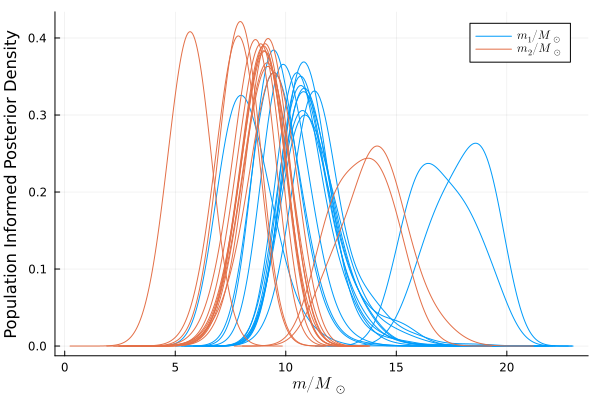

In [18]:
p = plot(xlabel=L"m / M_\odot", ylabel="Population Informed Posterior Density")
m1label = L"m_1 / M_\odot"
for n in DimensionalData.index(trace.posterior, :gwnames)
    p = density!(vec(trace.posterior.m1s_popwt[gwnames=At(n)]), color=1, label=m1label, bandwidth=0.75)
    m1label = nothing
end
m2label = L"m_2 / M_\odot"
for n in DimensionalData.index(trace.posterior, :gwnames)
    p = density!(vec(trace.posterior.m2s_popwt[gwnames=At(n)]), color=2, label=m2label, bandwidth=0.75)
    m2label = nothing
end
p

I bet our inference about the minimum BH mass is being driven by that one outlier.  Let's look:

In [19]:
nmin = ""
mmin = Inf
for n in DimensionalData.index(trace.posterior, :gwnames)
    mm = minimum(trace.posterior.m2s_popwt[gwnames=At(n)])

    if mm < mmin
        mmin = mm
        nmin = n
    end
    println("minimum(m2, $(n)): $(mm)")
end

println("Overall minimum is $(nmin)")

minimum(m2, GW190707_093326): 6.447149637066
minimum(m2, GW190708_232457): 10.676955710112418
minimum(m2, GW190720_000836): 5.835974895897672
minimum(m2, GW190728_064510): 5.890454978348947
minimum(m2, GW190924_021846): 3.2416786166579667
minimum(m2, GW190930_133541): 5.434838345873358
minimum(m2, GW191103_012549): 5.214392380367394
minimum(m2, GW191105_143521): 5.641627114842894
minimum(m2, GW191126_115259): 5.934334459250401
minimum(m2, GW191129_134029): 4.90182219880026
minimum(m2, GW191204_171526): 6.124538344275256
minimum(m2, GW191216_213338): 5.827383069546859
minimum(m2, GW200202_154313): 5.475846486438653
minimum(m2, GW200225_060421): 11.043419979258585
minimum(m2, GW200316_215756): 5.8039736743853485
Overall minimum is GW190924_021846


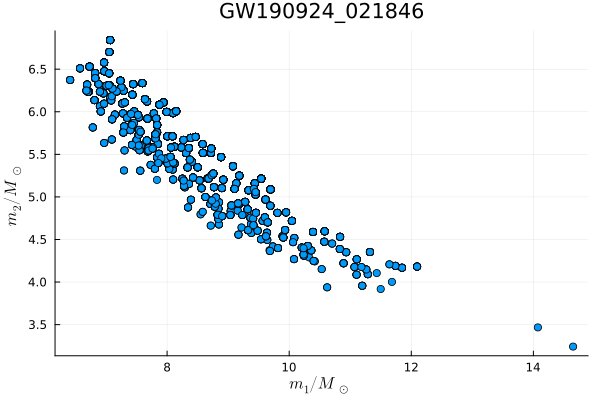

In [20]:
post = trace.posterior
scatter(vec(post.m1s_popwt[gwnames=At(nmin)]), vec(post.m2s_popwt[gwnames=At(nmin)]), label=nothing, xlabel=L"m_1 / M_\odot", ylabel=L"m_2 / M_\odot", title=nmin)